In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [296]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [268]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [269]:
null_age = train[train[['Age']].isnull().any(axis=1)]
null_cabin = train[train[['Cabin']].isnull().any(axis=1)]

In [270]:
null_age.head(20)

PassengerId  Survived  Pclass  \
5             6         0       3   
17           18         1       2   
19           20         1       3   
26           27         0       3   
28           29         1       3   
29           30         0       3   
31           32         1       1   
32           33         1       3   
36           37         1       3   
42           43         0       3   
45           46         0       3   
46           47         0       3   
47           48         1       3   
48           49         0       3   
55           56         1       1   
64           65         0       1   
65           66         1       3   
76           77         0       3   
77           78         0       3   
82           83         1       3   

                                              Name     Sex  Age  SibSp  Parch  \
5                                 Moran, Mr. James    male  NaN      0      0   
17                    Williams, Mr. Charles Eugene    male  NaN      0      0   
19                         Masselmani, Mrs. Fatima  female  NaN      0      0   
26                         Emir, Mr. Farred Chehab    male  NaN      0      0   
28                   O'Dwyer, Miss. Ellen "Nellie"  female  NaN      0      0   
29                             Todoroff, Mr. Lalio    male  NaN      0      0   
31  Spencer, Mrs. William Augustus (Marie Eugenie)  female  NaN      1      0   
32                        Glynn, Miss. Mary Agatha  female  NaN      0      0   
36                                Mamee, Mr. Hanna    male  NaN      0      0   
42                             Kraeff, Mr. Theodor    male  NaN      0      0   
45                        Rogers, Mr. William John    male  NaN      0      0   
46                               Lennon, Mr. Denis    male  NaN      1      0   
47                       O'Driscoll, Miss. Bridget  female  NaN      0      0   
48                             Samaan, Mr. Youssef    male  NaN      2      0   
55                               Woolner, Mr. Hugh    male  NaN      0      0   
64                           Stewart, Mr. Albert A    male  NaN      0      0   
65                        Moubarek, Master. Gerios    male  NaN      1      1   
76                               Staneff, Mr. Ivan    male  NaN      0      0   
77                        Moutal, Mr. Rahamin Haim    male  NaN      0      0   
82                  McDermott, Miss. Brigdet Delia  female  NaN      0      0   

             Ticket      Fare Cabin Embarked  
5            330877    8.4583   NaN        Q  
17           244373   13.0000   NaN        S  
19             2649    7.2250   NaN        C  
26             2631    7.2250   NaN        C  
28           330959    7.8792   NaN        Q  
29           349216    7.8958   NaN        S  
31         PC 17569  146.5208   B78        C  
32           335677    7.7500   NaN        Q  
36             2677    7.2292   NaN        C  
42           349253    7.8958   NaN        C  
45  S.C./A.4. 23567    8.0500   NaN        S  
46           370371   15.5000   NaN        Q  
47            14311    7.7500   NaN        Q  
48             2662   21.6792   NaN        C  
55            19947   35.5000   C52        S  
64         PC 17605   27.7208   NaN        C  
65             2661   15.2458   NaN        C  
76           349208    7.8958   NaN        S  
77           374746    8.0500   NaN        S  
82           330932    7.7875   NaN        Q

In [271]:
unique_age = np.sort(train['Age'].unique())

In [272]:
unique_age

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

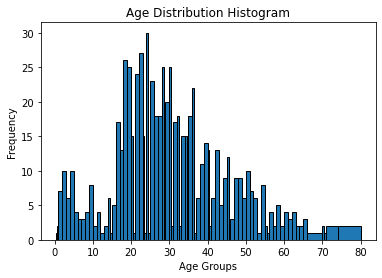

In [273]:
plt.hist(train['Age'].dropna(), bins=[0.42, 0.67, 0.75, 0.83, 0.92, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                    11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 20.5, 21.0, 22.0,
                                    23.0, 23.5, 24.0, 24.5, 25.0, 26.0, 27.0, 28.0, 28.5, 29.0, 30.0, 30.5, 31.0, 32.0,
                                    32.5, 33.0, 34.0, 34.5, 35.0, 36.0, 36.5, 37.0, 38.0, 39.0, 40.0, 40.5, 41.0, 42.0,
                                    43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0,
                                    55.5, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.0, 70.5,
                                    71.0, 74.0, 80.0],
         edgecolor='black')

plt.title('Age Distribution Histogram')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.show()

In [274]:
filtered_df = train[train['Name'].str.contains('Master')]
df_sorted = filtered_df.sort_values(by='Age', ascending=True)
df_sorted

PassengerId  Survived  Pclass  \
803          804         1       3   
755          756         1       2   
831          832         1       2   
78            79         1       2   
305          306         1       1   
827          828         1       2   
164          165         0       3   
788          789         1       3   
183          184         1       2   
386          387         0       3   
7              8         0       3   
16            17         0       3   
824          825         0       3   
340          341         1       2   
407          408         1       2   
348          349         1       3   
261          262         1       3   
193          194         1       2   
63            64         0       3   
445          446         1       1   
171          172         0       3   
850          851         0       3   
869          870         1       3   
751          752         1       3   
278          279         0       3   
50            51         0       3   
549          550         1       2   
787          788         0       3   
480          481         0       3   
489          490         1       3   
165          166         1       3   
182          183         0       3   
819          820         0       3   
802          803         1       1   
59            60         0       3   
125          126         1       3   
65            66         1       3   
159          160         0       3   
176          177         0       3   
709          710         1       3   

                                                  Name   Sex    Age  SibSp  \
803                    Thomas, Master. Assad Alexander  male   0.42      0   
755                          Hamalainen, Master. Viljo  male   0.67      1   
831                    Richards, Master. George Sibley  male   0.83      1   
78                       Caldwell, Master. Alden Gates  male   0.83      0   
305                     Allison, Master. Hudson Trevor  male   0.92      1   
827                              Mallet, Master. Andre  male   1.00      0   
164                       Panula, Master. Eino Viljami  male   1.00      4   
788                         Dean, Master. Bertram Vere  male   1.00      1   
183                          Becker, Master. Richard F  male   1.00      2   
386                    Goodwin, Master. Sidney Leonard  male   1.00      5   
7                       Palsson, Master. Gosta Leonard  male   2.00      3   
16                                Rice, Master. Eugene  male   2.00      4   
824                       Panula, Master. Urho Abraham  male   2.00      4   
340                     Navratil, Master. Edmond Roger  male   2.00      1   
407                     Richards, Master. William Rowe  male   3.00      1   
348             Coutts, Master. William Loch "William"  male   3.00      1   
261                  Asplund, Master. Edvin Rojj Felix  male   3.00      4   
193                         Navratil, Master. Michel M  male   3.00      1   
63                               Skoog, Master. Harald  male   4.00      3   
445                          Dodge, Master. Washington  male   4.00      0   
171                               Rice, Master. Arthur  male   4.00      4   
850            Andersson, Master. Sigvard Harald Elias  male   4.00      4   
869                    Johnson, Master. Harold Theodor  male   4.00      1   
751                                Moor, Master. Meier  male   6.00      0   
278                                 Rice, Master. Eric  male   7.00      4   
50                          Panula, Master. Juha Niilo  male   7.00      4   
549                     Davies, Master. John Morgan Jr  male   8.00      1   
787                          Rice, Master. George Hugh  male   8.00      4   
480                     Goodwin, Master. Harold Victor  male   9.00      5   
489              Coutts, Master. Eden Leslie "Neville"  male   9.00      1   
165    Goldsmith, Master. Fr

In [275]:
index_values_to_replace = [65, 159, 176, 709]

# Replacement value
replacement_value = 6

# Replace age column values for specified index values
train.loc[train.index.isin(index_values_to_replace), 'Age'] = replacement_value

In [276]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          718 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [277]:
missing_age_indices = train['Age'].isnull()
num_missing_age = missing_age_indices.sum()
random_age_values = np.random.uniform(25, 40, num_missing_age)

train.loc[missing_age_indices, 'Age'] = random_age_values

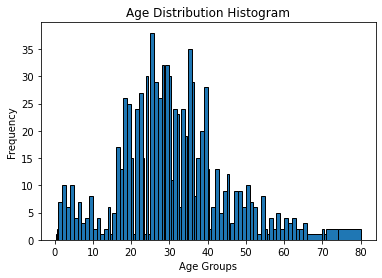

In [278]:
plt.hist(train['Age'].dropna(), bins=[0.42, 0.67, 0.75, 0.83, 0.92, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                    11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 20.5, 21.0, 22.0,
                                    23.0, 23.5, 24.0, 24.5, 25.0, 26.0, 27.0, 28.0, 28.5, 29.0, 30.0, 30.5, 31.0, 32.0,
                                    32.5, 33.0, 34.0, 34.5, 35.0, 36.0, 36.5, 37.0, 38.0, 39.0, 40.0, 40.5, 41.0, 42.0,
                                    43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0,
                                    55.5, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.0, 70.5,
                                    71.0, 74.0, 80.0],
         edgecolor='black')

plt.title('Age Distribution Histogram')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.show()

In [279]:
train = train.drop(columns=['Cabin'])

In [280]:
train = train.dropna(subset=['Embarked'])

In [281]:
train['Sex'] = train['Sex'].replace({'female': 0, 'male': 1})

In [282]:
train['Embarked'] = train['Embarked'].replace({'C': 0, 'Q': 1, 'S': 2})

In [283]:
train.drop(columns='PassengerId', inplace=True)

In [284]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    int64  
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 76.4+ KB


In [285]:
X =  train.drop(columns= ['Survived', 'Name', 'Ticket','Age','SibSp','Parch'])
y = train['Survived']

In [286]:
import seaborn as sns

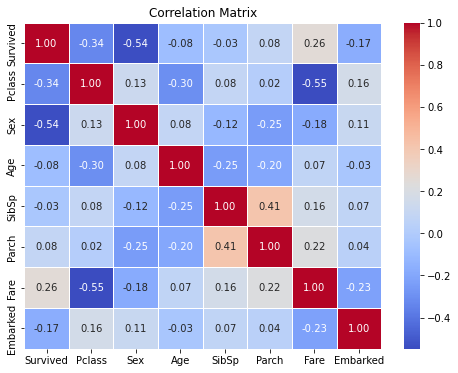

In [287]:
correlation_matrix = train.corr()

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, stratify= y, random_state=42)

In [290]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [291]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [292]:
from sklearn.linear_model import LogisticRegression

In [293]:
comparison_df = pd.DataFrame(columns=['Model', 'Accuracy'])

In [237]:
model_lr = LogisticRegression(random_state=42, penalty='l2', max_iter=1000)
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
classification_rep = classification_report(y_test, y_pred_lr)

comparison_df = comparison_df.append({'Model': 'Logistic Regression', 'Accuracy': accuracy_lr}, ignore_index=True)

print(f'Accuracy: {accuracy_lr:.5f}')
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.75785

Confusion Matrix:
[[110  28]
 [ 26  59]]


In [238]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [251]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = DecisionTreeClassifier(random_state=42, )

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
model_dt = grid_search.best_estimator_

y_pred_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
comparison_df = comparison_df.append({'Model': 'Decision Tree', 'Accuracy': accuracy_dt}, ignore_index=True)

conf_matrix = confusion_matrix(y_test, y_pred_lr)
classification_rep = classification_report(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_dt:.5f}')
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.79821

Confusion Matrix:
[[110  28]
 [ 26  59]]


In [240]:
from sklearn.ensemble import RandomForestClassifier

In [241]:
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
model_rf = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = model_rf.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

c:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

In [242]:
print(f'Best Parameters: {best_params}')
print(f'Accuracy of the Best Model: {accuracy:.5f}')
print('\nConfusion Matrix:')
print(conf_matrix)

Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy of the Best Model: 0.79372

Confusion Matrix:
[[123  15]
 [ 31  54]]


In [243]:
comparison_df = comparison_df.append({'Model': 'Random Forest', 'Accuracy': accuracy}, ignore_index=True)

In [244]:
from sklearn.neighbors import KNeighborsClassifier

In [245]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

model = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
model_KNN = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = model_KNN.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Accuracy of the Best Model: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)

c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Accuracy of the Best Model: 0.80

Confusion Matrix:
[[119  19]
 [ 26  59]]


c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "c:

In [246]:
print(f'Best Parameters: {best_params}')
print(f'Accuracy of the Best Model: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Accuracy of the Best Model: 0.80

Confusion Matrix:
[[119  19]
 [ 26  59]]


In [247]:
comparison_df = comparison_df.append({'Model': 'KNN', 'Accuracy': accuracy}, ignore_index=True)

In [248]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
comparison_df = comparison_df.append({'Model': 'Naive Bayes', 'Accuracy': accuracy}, ignore_index=True)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create an XGBoost model
model = XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
model_XGB = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = model_XGB.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Accuracy of the Best Model: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Accuracy of the Best Model: 0.78

Confusion Matrix:
[[117  21]
 [ 28  57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       138
           1       0.73      0.67      0.70        85

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



In [ ]:
comparison_df = comparison_df.append({'Model': 'XGBoost', 'Accuracy': accuracy}, ignore_index=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [257]:
model_NN = Sequential()
model_NN.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_NN.add(Dense(32, activation='relu'))
model_NN.add(Dense(1, activation='sigmoid'))

# Compile the model
model_NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_NN.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred_probs = model_NN.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

# Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy of the Model: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Epoch 1/10
17/17 [==============================] - 1s 9ms/step - loss: 0.6643 - accuracy: 0.6823 - val_loss: 0.6070 - val_accuracy: 0.7761
Epoch 2/10
17/17 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.7782 - val_loss: 0.5294 - val_accuracy: 0.7910
Epoch 3/10
17/17 [==============================] - 0s 3ms/step - loss: 0.5065 - accuracy: 0.7895 - val_loss: 0.4785 - val_accuracy: 0.7985
Epoch 4/10
17/17 [==============================] - 0s 3ms/step - loss: 0.4648 - accuracy: 0.7895 - val_loss: 0.4559 - val_accuracy: 0.7985
Epoch 5/10
17/17 [==============================] - 0s 3ms/step - loss: 0.4463 - accuracy: 0.7895 - val_loss: 0.4510 - val_accuracy: 0.7985
Epoch 6/10
17/17 [==============================] - 0s 3ms/step - loss: 0.4395 - accuracy: 0.7763 - val_loss: 0.4534 - val_accuracy: 0.7761
Epoch 7/10
17/17 [==============================] - 0s 3ms/step - loss: 0.4344 - accuracy: 0.7951 - val_loss: 0.4533 - val_accuracy: 0.7761
Epoch 8/10
17/17 [==

In [ ]:
comparison_df = comparison_df.append({'Model': 'Neural Network', 'Accuracy': accuracy}, ignore_index=True)

In [ ]:
comparison_df

Model  Accuracy
0  Logistic Regression  0.757848
1        Decision Tree  0.798206
2        Random Forest  0.793722
3                  KNN  0.798206
4          Naive Bayes  0.762332
5              XGBoost  0.780269
6       Neural Network  0.789238

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
X_train.head()

Pclass  Sex     Fare  Embarked
828       3    1   7.7500         1
238       2    1  10.5000         2
453       1    1  89.1042         0
516       2    0  10.5000         2
383       1    0  52.0000         2

In [301]:
submission = test.drop(columns=['Ticket','Cabin','Age','SibSp','Parch','Name'])
ID = submission.PassengerId
submission.drop(columns=['PassengerId'], inplace = True)

In [303]:
submission['Embarked'] = submission['Embarked'].replace({'C': 0, 'Q': 1, 'S': 2})

In [305]:
submission['Sex'] = submission['Sex'].replace({'female': 0, 'male': 1})

In [317]:
replacement_number = 35
submission = submission.fillna(replacement_number)

In [335]:
ID = pd.DataFrame(ID)

In [353]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = DecisionTreeClassifier(random_state=42, )

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

best_params = grid_search.best_params_
model_dt = grid_search.best_estimator_

dt_sub = model_dt.predict(submission)
df_dt = pd.DataFrame(dt_sub)
df_dt.rename(columns={0:'Survived'}, inplace=True)
df_dt = pd.concat([ID, df_dt], axis = 1)

In [350]:
df_dt.to_csv('DecisionTreeClassifier.csv',index=False)

In [352]:
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create an XGBoost model
model = XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
model_XGB = grid_search.best_estimator_

# Make predictions on the test set using the best model
XGB_sub = model_XGB.predict(submission)

In [356]:
df_XGB = pd.DataFrame(XGB_sub)
df_XGB.rename(columns={0:'Survived'}, inplace=True)
df_XGB = pd.concat([ID, df_XGB], axis = 1)

In [358]:
df_XGB.to_csv('XGBClassifier.csv',index=False)

In [360]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
submission_scaled = scaler.transform(submission)

model_NN = Sequential()
model_NN.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model_NN.add(Dense(32, activation='relu'))
model_NN.add(Dense(1, activation='sigmoid'))

# Compile the model
model_NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_NN.fit(X_scaled, y, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred_probs = model_NN.predict(submission_scaled)
NN_sub = (y_pred_probs > 0.5).astype(int)

Epoch 1/10
23/23 [==============================] - 1s 7ms/step - loss: 0.6305 - accuracy: 0.6554 - val_loss: 0.5468 - val_accuracy: 0.8090
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.7876 - val_loss: 0.4662 - val_accuracy: 0.8146
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.7806 - val_loss: 0.4306 - val_accuracy: 0.7978
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.7848 - val_loss: 0.4182 - val_accuracy: 0.8090
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.8017 - val_loss: 0.4164 - val_accuracy: 0.8146
Epoch 6/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.7989 - val_loss: 0.4158 - val_accuracy: 0.8146
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.8073 - val_loss: 0.4143 - val_accuracy: 0.8146
Epoch 8/10
23/23 [==

In [361]:
df_NN = pd.DataFrame(NN_sub)
df_NN.rename(columns={0:'Survived'}, inplace=True)
df_NN = pd.concat([ID, df_NN], axis = 1)

In [363]:
df_NN.to_csv('NeuralNetwork.csv',index=False)

In [ ]:
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
model_rf = grid_search.best_estimator_

# Make predictions on the test set using the best model
RF_sub = model_rf.predict(submission)

In [365]:
df_RF = pd.DataFrame(RF_sub)
df_RF.rename(columns={0:'Survived'}, inplace=True)
df_RF = pd.concat([ID, df_RF], axis = 1)

In [367]:
df_RF.to_csv('RandomForestClassifier.csv',index=False)

In [368]:
model_lr = LogisticRegression(random_state=42, penalty='l2', max_iter=1000)
model_lr.fit(X, y)

# Make predictions on the test set
LR_sub = model_lr.predict(submission)


In [369]:
df_LR = pd.DataFrame(LR_sub)
df_LR.rename(columns={0:'Survived'}, inplace=True)
df_LR = pd.concat([ID, df_LR], axis = 1)

In [371]:
df_LR.to_csv('LogisticRegressor.csv',index=False)

For future iterations try categorizing age instead of neglecting, maybe 4 or 5 categories so that the null values have a good chance of being correct if randomly chosen. Also try categorizing cabin and making null values there own category as this could be for people without a cabin (lower class??)